In [11]:
import pikepdf
import pdfplumber
import pandas as pd

def remove_pdf_password(input_pdf, output_pdf, password):
    # Open the encrypted PDF and remove the password
    with pikepdf.open(input_pdf, password=password) as pdf:
        pdf.save(output_pdf)

def pdf_to_csv(pdf_file, output_csv_file):
    with pdfplumber.open(pdf_file) as pdf:
        # Extract tables from all pages
        tables = [page.extract_table() for page in pdf.pages]
        
        # Flatten the tables list and convert to DataFrame
        all_data = [row for table in tables for row in table]
        df = pd.DataFrame(all_data[1:], columns=all_data[0])  # First row is header
        
        # Save to CSV
        df.to_csv(output_csv_file, index=False)
        print(f"PDF has been successfully converted to {output_csv_file}")

# Example usage
pdf_file = "PhonePe_Transaction_Statement.pdf"  # Replace with your PDF file
output_pdf = "unlocked_PhonePe_Transaction_Statement.pdf"  # Temporary unlocked PDF file
output_csv_file = "Bankstatement.csv"  # Desired output CSV file
password = "9108422136"  # PDF password

# Remove the password and save the unlocked PDF
remove_pdf_password(pdf_file, output_pdf, password)

# Convert the unlocked PDF to CSV
pdf_to_csv(output_pdf, output_csv_file)



PDF has been successfully converted to Bankstatement.csv


In [9]:
pip install pikepdf

   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   ---------------------------------------- 3.5/3.5 MB 22.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pikepdf
import pdfplumber
import pandas as pd

def remove_pdf_password(input_pdf, output_pdf, password):
    # Open the encrypted PDF and remove the password
    with pikepdf.open(input_pdf, password=password) as pdf:
        pdf.save(output_pdf)

def pdf_to_csv(pdf_file, output_csv_file):
    with pdfplumber.open(pdf_file) as pdf:
        # Extract tables only from even-numbered pages (page numbers are 1-based)
        tables = []
        for i, page in enumerate(pdf.pages):
            if (i + 1) % 2 == 0:  # Check if the page number is even
                tables.append(page.extract_table())
        
        # Flatten the tables list and convert to DataFrame
        all_data = [row for table in tables for row in table]
        if all_data:
            df = pd.DataFrame(all_data[1:], columns=all_data[0])  # First row is header
            # Save to CSV
            df.to_csv(output_csv_file, index=False)
            print(f"PDF has been successfully converted to {output_csv_file}")
        else:
            print("No tables found on even-numbered pages.")

# Example usage
pdf_file = "PhonePe_Transaction_Statement.pdf"  # Replace with your PDF file
output_pdf = "unlocked_PhonePe_Transaction_Statement.pdf"  # Temporary unlocked PDF file
output_csv_file = "Bankstatement.csv"  # Desired output CSV file
password = "9108422136"  # PDF password

# Remove the password and save the unlocked PDF
remove_pdf_password(pdf_file, output_pdf, password)

# Convert the unlocked PDF to CSV, focusing on even-numbered pages
pdf_to_csv(output_pdf, output_csv_file)


PDF has been successfully converted to Bankstatement.csv


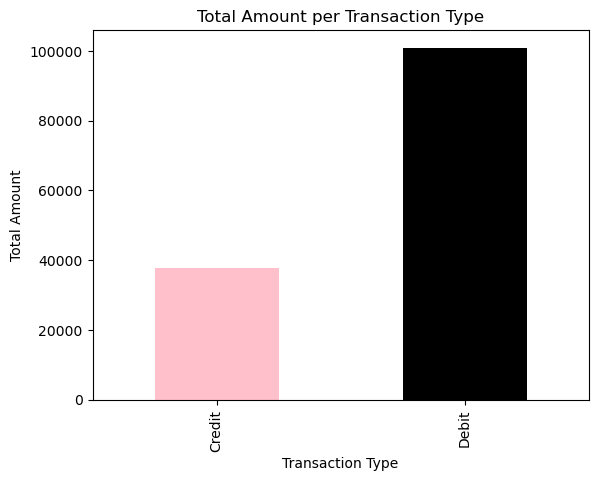

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV
df = pd.read_csv('Bankstatement1.csv')

# Remove non-numeric characters from 'Amount' and convert to numeric
df['Amount'] = df['Amount'].replace(r'[^\d.]', '', regex=True).astype(float)

# Group by 'Type' and sum 'Amount'
transaction_summary = df.groupby('Type')['Amount'].sum()

# Specify different colors for the bars
colors = ['pink', 'black']  # Example colors

# Plot the bar graph with specified colors
transaction_summary.plot(kind='bar', color=colors[:len(transaction_summary)])

plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')
plt.title('Total Amount per Transaction Type')
plt.show()


C:\Users\Rupali R\AppData\Local\Temp\ipykernel_12912\1506361265.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


AttributeError: 'Axes' object has no attribute 'set_labels'

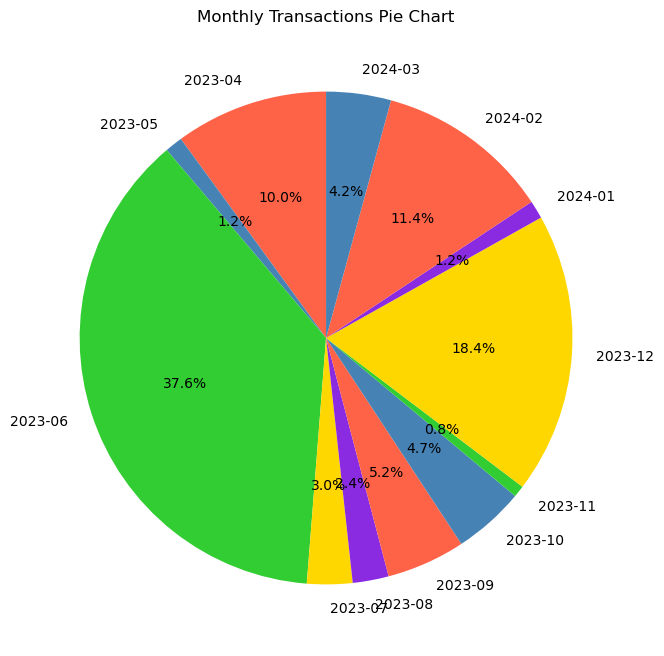

In [42]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV
df = pd.read_csv('Bankstatement1.csv')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove non-numeric characters from 'Amount' and convert to numeric
df['Amount'] = df['Amount'].replace(r'[^\d.]', '', regex=True).astype(float)

# Extract the month and year from the 'Date' column
df['Month'] = df['Date'].dt.to_period('M')

# Group by month and calculate the total amount per month
monthly_transactions = df.groupby('Month')['Amount'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
ax = monthly_transactions.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2'])

# Display the title and show the plot
plt.title('Monthly Transactions Pie Chart')
plt.ylabel('')  # Hide the ylabel for cleaner chart

# Set the labels to display month names
labels = [month.strftime('%B %Y') for month in monthly_transactions.index]
ax.set_labels(labels)

plt.show()
